In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

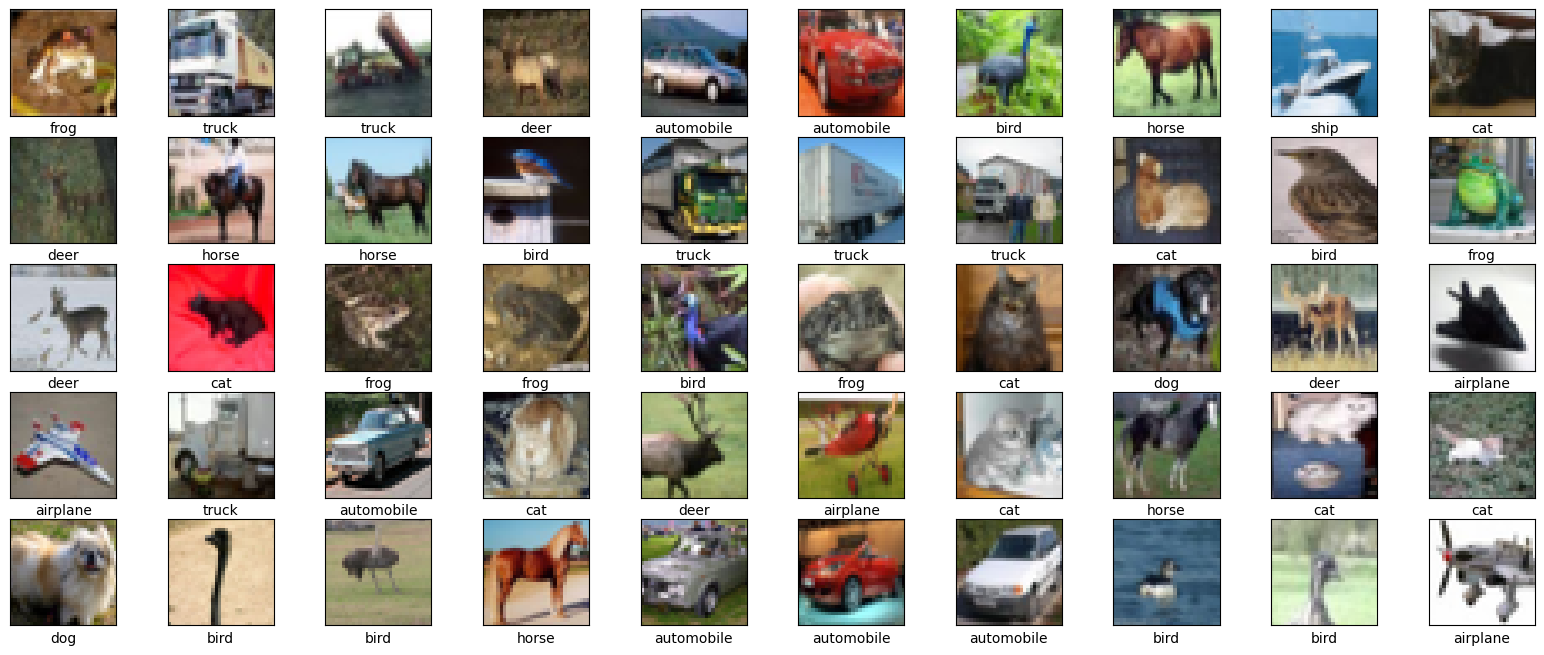

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train_processed, X_test_processed = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential()

# Convolutional Layers
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                        

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model_l1 = keras.Sequential()

# Convolutional Layers
model_l1.add(layers.Conv2D(16, (3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l1(0.01), input_shape=(32, 32, 3)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.4))

model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.4))

model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.4))

# Fully Connected Layers
model_l1.add(layers.Flatten())
model_l1.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Dropout(0.5))
model_l1.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))

model_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_8 (Batc  (None, 30, 30, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                      

In [9]:
model_l1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model_l2 = keras.Sequential()

# Convolutional Layers
model_l2.add(layers.Conv2D(16, (3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(0.01), input_shape=(32, 32, 3)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.4))

model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.4))

model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.4))

# Fully Connected Layers
model_l2.add(layers.Flatten())
model_l2.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Dropout(0.5))
model_l2.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

model_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_16 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_17 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                      

In [11]:
model_l2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
epochs = 20

In [13]:
model_processed = model
h = model.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 22s 11ms/step - loss: 2.1005 - accuracy: 0.2953 - val_loss: 1.6583 - val_accuracy: 0.3815
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 1.5291 - accuracy: 0.4439 - val_loss: 1.2593 - val_accuracy: 0.5406
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 1.2986 - accuracy: 0.5313 - val_loss: 1.1355 - val_accuracy: 0.5942
Epoch 4/20
625/625 [==============================] - 6s 9ms/step - loss: 1.1854 - accuracy: 0.5753 - val_loss: 1.7826 - val_accuracy: 0.4441
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 1.0907 - accuracy: 0.6134 - val_loss: 1.0883 - val_accuracy: 0.6274
Epoch 6/20
625/625 [==============================] - 5s 9ms/step - loss: 1.0129 - accuracy: 0.6412 - val_loss: 0.9852 - val_accuracy: 0.6461
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.9522 - accuracy: 0.6644 - val_loss: 0.8794 - val_accuracy: 0.6909
E

In [14]:
h_processed = model_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 8s 12ms/step - loss: 0.6992 - accuracy: 0.7579 - val_loss: 3.3064 - val_accuracy: 0.1548
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 0.6794 - accuracy: 0.7648 - val_loss: 0.6134 - val_accuracy: 0.7832
Epoch 3/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6668 - accuracy: 0.7681 - val_loss: 0.6165 - val_accuracy: 0.7872
Epoch 4/20
625/625 [==============================] - 6s 9ms/step - loss: 0.6565 - accuracy: 0.7749 - val_loss: 0.6560 - val_accuracy: 0.7759
Epoch 5/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6502 - accuracy: 0.7729 - val_loss: 0.6066 - val_accuracy: 0.7908
Epoch 6/20
625/625 [==============================] - 6s 9ms/step - loss: 0.6492 - accuracy: 0.7760 - val_loss: 0.6029 - val_accuracy: 0.7892
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.6416 - accuracy: 0.7774 - val_loss: 0.5918 - val_accuracy: 0.7969
Ep

In [15]:
model_l1_processed = model_l1
h1 = model_l1.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 13s 11ms/step - loss: 19.8380 - accuracy: 0.2986 - val_loss: 4.8045 - val_accuracy: 0.1509
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 3.7024 - accuracy: 0.3407 - val_loss: 3.3527 - val_accuracy: 0.3401
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 3.2115 - accuracy: 0.3482 - val_loss: 3.3033 - val_accuracy: 0.2723
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 2.9880 - accuracy: 0.3505 - val_loss: 2.8684 - val_accuracy: 0.3800
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 2.8914 - accuracy: 0.3576 - val_loss: 3.2899 - val_accuracy: 0.3195
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 2.9290 - accuracy: 0.3633 - val_loss: 3.1229 - val_accuracy: 0.3148
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 2.9191 - accuracy: 0.3746 - val_loss: 3.2534 - val_accuracy: 0.264

In [16]:
h1_processed = model_l1_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 8s 11ms/step - loss: 2.7298 - accuracy: 0.4317 - val_loss: 4.1935 - val_accuracy: 0.0963
Epoch 2/20
625/625 [==============================] - 7s 10ms/step - loss: 2.7372 - accuracy: 0.4345 - val_loss: 2.6240 - val_accuracy: 0.4742
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 2.7052 - accuracy: 0.4370 - val_loss: 2.6044 - val_accuracy: 0.4513
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 2.6989 - accuracy: 0.4404 - val_loss: 2.8496 - val_accuracy: 0.4107
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 2.6923 - accuracy: 0.4419 - val_loss: 2.6644 - val_accuracy: 0.4330
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 2.6950 - accuracy: 0.4376 - val_loss: 2.7119 - val_accuracy: 0.4449
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 2.7101 - accuracy: 0.4393 - val_loss: 2.9342 - val_accuracy: 0.3567

In [17]:
model_l2_processed = model_l2
h2 = model_l2.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 13s 10ms/step - loss: 5.4704 - accuracy: 0.3124 - val_loss: 3.3834 - val_accuracy: 0.4030
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 2.5332 - accuracy: 0.4786 - val_loss: 2.2508 - val_accuracy: 0.4838
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 1.8380 - accuracy: 0.5502 - val_loss: 1.9931 - val_accuracy: 0.4687
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 1.6475 - accuracy: 0.5863 - val_loss: 1.5117 - val_accuracy: 0.6302
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 1.5744 - accuracy: 0.6108 - val_loss: 1.7196 - val_accuracy: 0.5510
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 1.5430 - accuracy: 0.6277 - val_loss: 1.5325 - val_accuracy: 0.6283
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 1.5093 - accuracy: 0.6405 - val_loss: 1.4538 - val_accuracy: 0.6631


In [18]:
h2_processed = model_l2_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 8s 12ms/step - loss: 1.4520 - accuracy: 0.6680 - val_loss: 4.3094 - val_accuracy: 0.0997
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 1.4309 - accuracy: 0.6761 - val_loss: 1.4229 - val_accuracy: 0.6870
Epoch 3/20
625/625 [==============================] - 7s 11ms/step - loss: 1.4249 - accuracy: 0.6750 - val_loss: 1.3689 - val_accuracy: 0.6950
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 1.4169 - accuracy: 0.6748 - val_loss: 1.4704 - val_accuracy: 0.6654
Epoch 5/20
625/625 [==============================] - 7s 11ms/step - loss: 1.4169 - accuracy: 0.6755 - val_loss: 1.4359 - val_accuracy: 0.6657
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 1.4117 - accuracy: 0.6766 - val_loss: 1.4800 - val_accuracy: 0.6457
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 1.4094 - accuracy: 0.6781 - val_loss: 1.2879 - val_accuracy: 0.7141

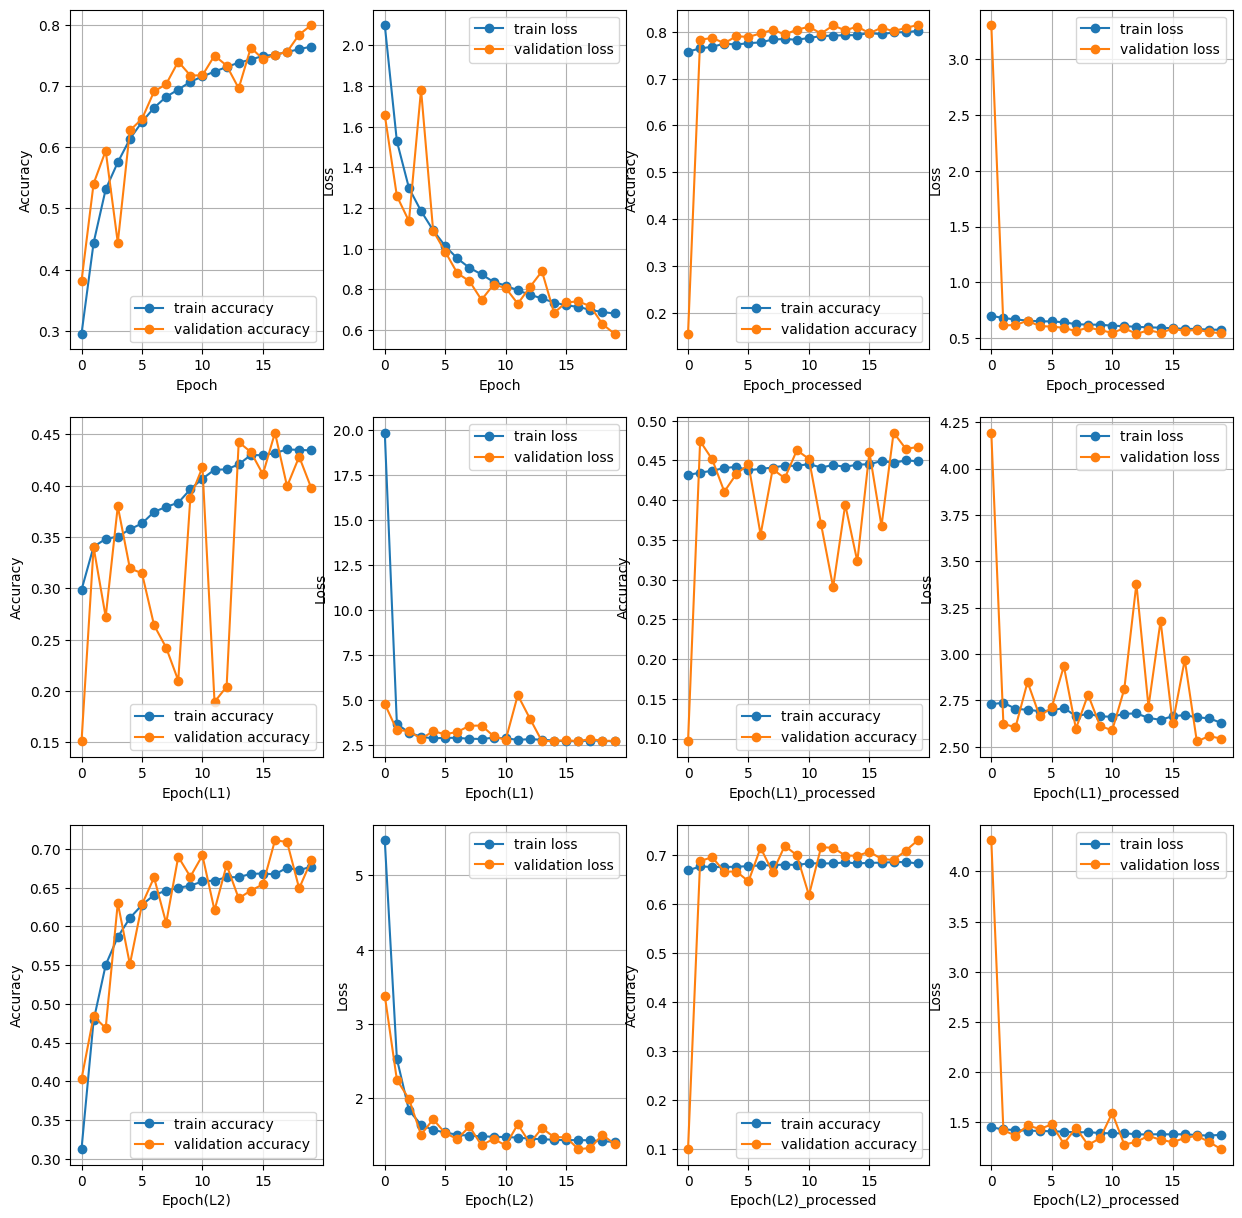

In [19]:
plt.figure(figsize=(15,15))

plt.subplot(3,4,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,3)
plt.plot(h_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,4)
plt.plot(h_processed.history['loss'], 'o-', label='train loss')
plt.plot(h_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,5)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,6)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,7)
plt.plot(h1_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,8)
plt.plot(h1_processed.history['loss'], 'o-', label='train loss')
plt.plot(h1_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,9)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,10)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,11)
plt.plot(h2_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,12)
plt.plot(h2_processed.history['loss'], 'o-', label='train loss')
plt.plot(h2_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_acc, test_loss = model.evaluate(X_test, Y_test)
test_acc_processed, test_loss_processed = model_processed.evaluate(X_test_processed, Y_test)
test_acc_l1, test_loss_l1 = model_l1.evaluate(X_test, Y_test)
test_acc_l1_processed, test_loss_l1_processed = model_l1_processed.evaluate(X_test_processed, Y_test)
test_acc_l2, test_loss_l2 = model_l2.evaluate(X_test, Y_test)
test_acc_l2_processed, test_loss_l2_processed = model_l2_processed.evaluate(X_test_processed, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2560 - accuracy: 0.7249


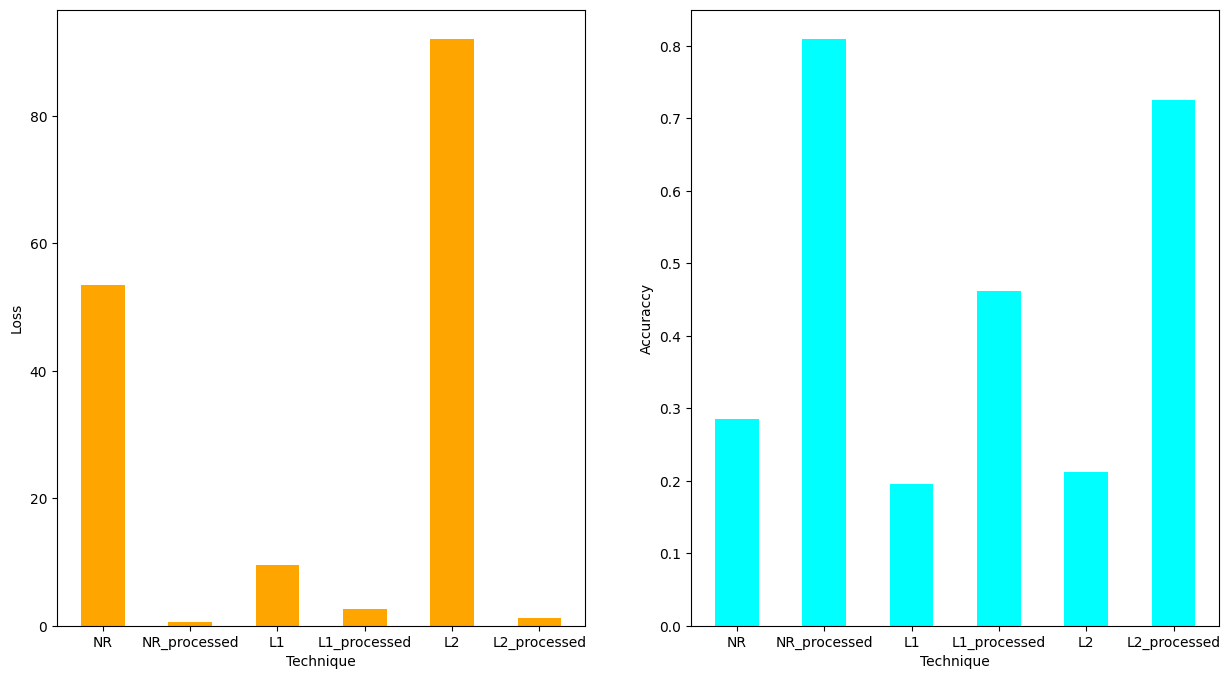

In [21]:
plt.figure(figsize=(15,8))

x = np.arange(6)
y1 = [test_loss, test_loss_processed, test_loss_l1, test_loss_l1_processed, test_loss_l2, test_loss_l2_processed]
y2 = [test_acc, test_acc_processed, test_acc_l1, test_acc_l1_processed, test_acc_l2, test_acc_l2_processed]
width = 0.5

# plot data in grouped manner of bar type
plt.subplot(1,2,1)
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['NR', 'NR_processed', 'L1', 'L1_processed', 'L2', 'L2_processed'])
plt.xlabel("Technique")
plt.ylabel("Loss")

# plot data in grouped manner of bar type
plt.subplot(1,2,2)
plt.bar(x, y1, width, color='cyan')
plt.xticks(x, ['NR', 'NR_processed', 'L1', 'L1_processed', 'L2', 'L2_processed'])
plt.xlabel("Technique")
plt.ylabel("Accuraccy")
plt.show()